<a href="https://colab.research.google.com/github/rehammahal/COVID-19-project/blob/main/COVID19rPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
! pip install xlrd
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pn
import numpy as np
import plotly.express as px
import plotly
import folium


path = "COVID19-project.xlsx"

covidData = pn.read_excel(path)

#Before
print("------------ Dataset Before ------------")
print(covidData)

#Check All Data Types
print("------------ Check All Data Types ------------")
print(covidData.dtypes)

#Check All Statisical Matric of Dataset
print("------------ Check All Statisical Matric of Dataset ------------")
print(covidData.describe(include="all"))

#Drop Daily\Cumulative and Event Attributes
new_covidData = covidData.drop('Event', axis = 'columns', inplace = True)
new_covidData = covidData.drop('Daily / Cumulative', axis = 'columns', inplace = True)

#Drop Records We Don't Need
new_covidData = covidData.drop(range(1277,30873), axis = 'rows', inplace = True)

#Drop Total Records
new_covidData = covidData[covidData["City"].str.contains("Total")==False]

#Change Wrong Format in Dataset
new_covidData["Cases"].replace("?", np.nan, inplace = True)

#Save New Data Frame after Changing
new_covidData.to_excel("newCleaningCOVID19.xlsx")

#After
print("------------ Dataset After ------------")
print(new_covidData)

------------ Dataset Before ------------
      Daily / Cumulative     Indicator  ...                        City Cases
0                  Daily         Cases  ...                       Qatif     1
1                  Daily         Cases  ...                       Qatif     1
2                  Daily         Cases  ...                       Qatif     2
3                  Daily         Cases  ...                       Total     4
4                  Daily         Cases  ...                      Dammam     4
...                  ...           ...  ...                         ...   ...
30868         Cumulative  Active cases  ...             Hazm Al Jalamid    18
30869         Cumulative  Active cases  ...  Al Hadithah Border Station     5
30870         Cumulative  Active cases  ...                   Al Aydabi     1
30871         Cumulative  Active cases  ...                       Umluj    26
30872         Cumulative  Active cases  ...                       Bqeeq    41

[30873 rows x 7 column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



------------ Dataset After ------------
         Indicator       Date          region       City  Cases
0            Cases 2020-03-02  Eastern Region      Qatif    1.0
1            Cases 2020-03-04  Eastern Region      Qatif    1.0
2            Cases 2020-03-07  Eastern Region      Qatif    2.0
4            Cases 2020-03-10  Eastern Region     Dammam    4.0
5            Cases 2020-03-12           Mecca      Mecca   21.0
...            ...        ...             ...        ...    ...
1271   Mortalities 2020-06-13           Jazan      Sabya    1.0
1272   Mortalities 2020-06-13          Riyadh  Huraymila    1.0
1273   Mortalities 2020-06-13           Jazan      Baish    1.0
1274  Active cases 2020-03-02  Eastern Region      Qatif    1.0
1276  Active cases 2020-03-07  Eastern Region      Qatif    7.0

[1226 rows x 5 columns]


In [14]:
#Binning Data
print("------------ Binning Data ------------")
bins = new_covidData.groupby([new_covidData['Date'].dt.strftime('%W')])['Cases'].sum()
print(bins)

#Descriptive Statistical
print("------------ Descriptive Statstical ------------")
desc_covid = new_covidData["Indicator"].value_counts()
desc_covid.rename(index={"Indicator":"Values"}, inplace = True)
desc_covid.index.rename = "Indicator"
print(desc_covid)

#Groping Data
print("------------ Groping data ------------")
Group_By = new_covidData[["Indicator", "region", "Cases"]]
Group_By_Test = Group_By.groupby(["Indicator", "region"], as_index = False).mean()
print(Group_By_Test)



------------ Binning Data ------------
Date
09      12.0
10      52.0
11      72.0
12     186.0
13     226.0
14     728.0
15    1233.0
16    1787.0
17    2479.0
18    3124.0
19    5972.0
20    8960.0
21    5851.0
22    5629.0
23    6377.0
Name: Cases, dtype: float64
------------ Descriptive Statstical ------------
Cases           688
Recoveries      467
Mortalities      69
Active cases      2
Name: Indicator, dtype: int64
------------ Groping data ------------
       Indicator            region       Cases
0   Active cases    Eastern Region    4.000000
1          Cases          Al Bahah    2.666667
2          Cases           Al Jouf    1.888889
3          Cases              Asir    4.702703
4          Cases    Eastern Region   35.740000
5          Cases              Hail   12.181818
6          Cases             Jazan   10.318182
7          Cases             Mecca   75.327273
8          Cases            Medina   47.526316
9          Cases            Najran    4.777778
10         Cases  

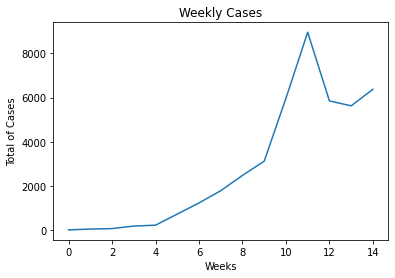

In [15]:
#Line plot
Line_PlotCovid19 = new_covidData.groupby([new_covidData['Date'].dt.strftime('%W')])['Cases'].sum()
ypoints = np.array(Line_PlotCovid19)
plt.plot(ypoints)
plt.title('Weekly Cases')
plt.ylabel('Total of Cases')
plt.xlabel('Weeks')
plt.show()


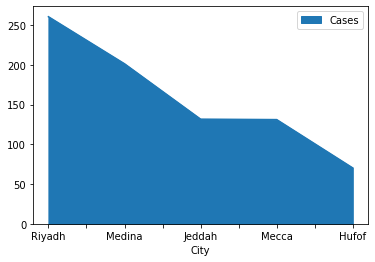

In [16]:
#Area Plot
Group_ByCovid19 = new_covidData[["City", "Cases"]]
Group_By_Plot = Group_ByCovid19.groupby(["City"], as_index = True).mean()
Group_By_Plot.sort_values(['Cases'], ascending = False, axis = 0, inplace = True)
Group_By_Plot = Group_By_Plot.head(5)
Group_By_Plot.plot(kind = "area")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



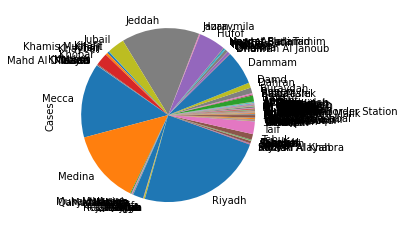

In [17]:
#Pie Chart
new_covidData['Cases'] = new_covidData.sum(axis=1)
new_covidData.set_index('City', inplace=True)
new_covidData = new_covidData.groupby('City', axis=0).sum()
new_covidData['Cases'].plot(kind = 'pie')
plt.show()